In [1]:
import pandas as pd

# Load the file (replace with your path)
df = pd.read_csv("/Users/alarakaymak/Desktop/NSDUH_2023_Tab.txt", delimiter="\t")  # Or "," if comma-delimited

# Show the first few rows
print(df.head())




/var/folders/_0/w20l1hyj7cj8xvjxmn1f2fc40000gn/T/ipykernel_37932/606496536.py:4: DtypeWarning: Columns (2635) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/alarakaymak/Desktop/NSDUH_2023_Tab.txt", delimiter="\t")  # Or "," if comma-delimited


   QUESTID2    FILEDATE     ANALWT2_C  VESTR_C  VEREP  PDEN10  COUTYP4  \
0  10000053  10/21/2024   3276.469874    40031      2       2        2   
1  10000679  10/21/2024  15630.082955    40021      2       2        3   
2  10001208  10/21/2024   4018.172390    40043      1       2        2   
3  10001260  10/21/2024  10711.709540    40030      2       2        2   
4  10001588  10/21/2024   8195.104779    40023      2       2        2   

   MAIIN102  AIIND102  AGE3  ...  COSUTELE2  COSUAPTDL2  COSURXDL2  \
0         2         2    10  ...        3.0         3.0        3.0   
1         2         2     9  ...        3.0         3.0        3.0   
2         2         2     9  ...        3.0         3.0        3.0   
3         2         2     1  ...        2.0         2.0        2.0   
4         2         2    10  ...        3.0         3.0        3.0   

   COSUSVHLT2  COHCTELE2  COHCAPTDL2  COHCRXDL2  COHCSVHLT2  LANGVER  GQTYPE2  
0         3.0        3.0         3.0        3.0       

In [2]:
# Save as CSV
df.to_csv("/Users/alarakaymak/Desktop/NSDUH_2023_Tab.csv", index=False) 

In [2]:
print(df.columns.tolist())


['QUESTID2', 'FILEDATE', 'ANALWT2_C', 'VESTR_C', 'VEREP', 'PDEN10', 'COUTYP4', 'MAIIN102', 'AIIND102', 'AGE3', 'SERVICE', 'MILSTAT', 'ACTDEVER', 'ACTD2001', 'ACTD9001', 'ACTD7590', 'ACTDVIET', 'ACTDPRIV', 'COMBATPY', 'NOMARR2', 'HEALTH', 'MOVSINPYR2', 'SEXATRACT2', 'SEXIDENT22', 'SPEAKENGL', 'LVLDIFSEE2', 'LVLDIFHEAR2', 'LVLDIFWALK2', 'LVLDIFMEM2', 'LVLDIFCARE2', 'LVLDIFCOMM2', 'IRSEX', 'IRMARIT', 'IIMARIT', 'IREDUHIGHST2', 'IIEDUHIGHST2', 'CATAGE', 'CATAG2', 'CATAG3', 'CATAG6', 'CATAG7', 'PREGAGE2', 'DRVINAGE', 'DRVINDETAG', 'SEXAGE', 'NEWRACE2', 'SEXRACE', 'EDUHIGHCAT', 'HEALTH2', 'EDUSCHLGO', 'EDUSCHGRD2', 'EDUFULPAR', 'EDUSCKMON', 'EDUSCKEST', 'EDUSCKCOM', 'EDUSKPMON', 'EDUSKPEST', 'EDUSKPCOM', 'MILTFAMLY', 'MILTSPPAR', 'MILTPARNT', 'MILTCHLDR', 'MILTSIBLN', 'ENRLCOLLFT2', 'ENRLCOLLST2', 'WRKSTATWK2', 'WRKDPSTWK', 'WRKHADJOB', 'WRKDHRSWK2', 'WRK35WKUS', 'WRKRSNNOT', 'WRKRSNJOB', 'WRKEFFORT', 'WRKDPSTYR', 'WRKSELFEM', 'WRKNUMJOB2', 'WRKNJBPYR', 'WRKNJBWKS', 'WRKLASTYR2', 'WRKSICKMO'

In [8]:
rename_dict = {
    'ALCFLAG': 'AlcoholUse_PastMonth',
    'MRJFLAG': 'MarijuanaUse_PastYear',
    'COCFLAG': 'CocaineUse_PastYear',
    'METHAMFLAG': 'MethamphetamineUse_PastYear',
    'OPINMMON': 'OpioidMisuse_PastMonth',
    'CNSNMMON': 'StimulantMisuse_PastMonth',
    'UD5OPIANY': 'OpioidUseDisorder_PastYear',
    'UD5ILLANY': 'IllicitDrugUseDisorder',
    'UD5ILALANY': 'SubstanceUseDisorder',
    'IRPYUD5ALC': 'AlcoholUseDisorder_PastYear',
    'SUTRTPY': 'ReceivedTreatment_PastYear',
    'YUSUITHKYR': 'Youth_SuicideThoughts_PastYear',
    'YUSUIPLNYR': 'Youth_SuicidePlans_PastYear',
    'YUSUITRYYR': 'Youth_SuicideAttempts_PastYear',
    'IRSUITTHNK': 'SuicideThoughts_PastYear',
    'AMISUD5ANY': 'AnySUDwithAMI_PastYear',
    'IMFYR': 'IllegallyMadeFentanyl_Use',
    'FPIMFNMYR': 'FentanylProductMisuse_Year',
    'QUESTID2': 'RespondentID',
    'AGE3': 'Age',
    'IRSEX': 'Gender',
    'NEWRACE2': 'Race',
    'IREDUHIGHST2': 'Education',
    'INCOME': 'Income',
    'IRWRKSTAT': 'WorkStatus',
    'HEALTH': 'Health'
}


In [9]:
df.columns = df.columns.str.strip().str.upper()


In [10]:
# Step 1: Make sure all the keys in rename_dict exist in the dataframe
existing_keys = [col for col in rename_dict.keys() if col in df.columns]

# Step 2: Filter rename_dict to only include columns that exist in the dataframe
filtered_rename_dict = {k: v for k, v in rename_dict.items() if k in existing_keys}

# Step 3: Rename only the existing columns
df_renamed = df.rename(columns=rename_dict)

# Step 4: Keep only the renamed columns
columns_to_keep = list(filtered_rename_dict.values())
filtered_df = df_renamed[columns_to_keep]


In [11]:
filtered_df

,AlcoholUse_PastMonth,MarijuanaUse_PastYear,CocaineUse_PastYear,MethamphetamineUse_PastYear,OpioidMisuse_PastMonth,StimulantMisuse_PastMonth,OpioidUseDisorder_PastYear,IllicitDrugUseDisorder,SubstanceUseDisorder,AlcoholUseDisorder_PastYear,...,IllegallyMadeFentanyl_Use,FentanylProductMisuse_Year,RespondentID,Age,Gender,Race,Education,Income,WorkStatus,Health
0,1,0,0,0,0,0,0,0,0,0,...,0,0,10000053,10,1,7,9,3,4,2
1,1,1,1,0,0,0,0,0,1,1,...,0,0,10000679,9,1,1,8,4,1,2
2,0,0,0,1,0,1,0,1,1,0,...,0,0,10001208,9,2,4,8,1,4,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,10001260,1,1,7,2,2,99,3
4,1,1,0,0,0,0,0,0,0,0,...,0,0,10001588,10,1,6,11,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56700,0,0,0,0,0,0,0,0,0,0,...,0,0,50556120,9,2,7,1,1,2,4
56701,1,0,0,0,0,0,0,0,0,0,...,0,0,50557151,11,2,1,10,4,4,2
56702,1,1,1,0,0,0,0,0,0,0,...,0,0,50558694,10,2,1,11,4,1,2
56703,1,1,0,0,0,0,0,0,0,0,...,0,0,50558696,11,1,5,11,4,4,2


In [12]:
import os

# Get your Desktop path
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "filtered_df.csv")

# Save the DataFrame to CSV
filtered_df.to_csv(desktop_path, index=False)

print(f"CSV file saved to: {desktop_path}")


CSV file saved to: /Users/alarakaymak/Desktop/filtered_df.csv


📊 Classification Report (XGBoost + SMOTE):

              precision    recall  f1-score   support

           0       0.93      0.74      0.83      9179
           1       0.41      0.75      0.53      2162

    accuracy                           0.75     11341
   macro avg       0.67      0.75      0.68     11341
weighted avg       0.83      0.75      0.77     11341



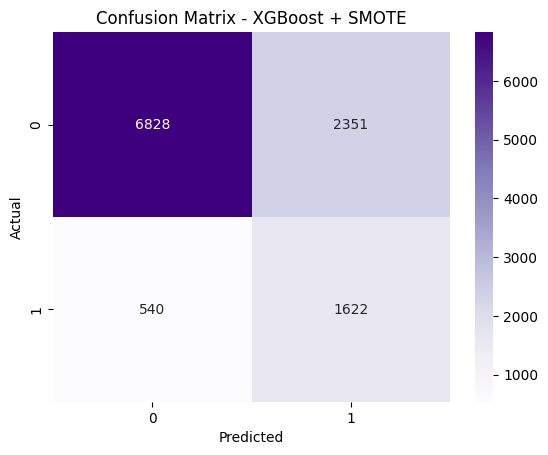

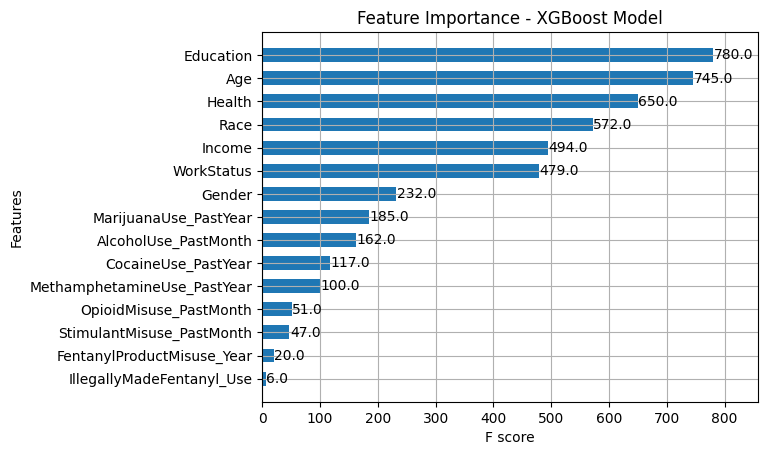

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("/Users/alarakaymak/Desktop/filtered_df.csv")

# Define features (same as your full model)
features = [
    'Age', 'Gender', 'Race', 'Education', 'Income', 'WorkStatus', 'Health',
    'AlcoholUse_PastMonth', 'MarijuanaUse_PastYear', 'CocaineUse_PastYear',
    'MethamphetamineUse_PastYear', 'OpioidMisuse_PastMonth', 'StimulantMisuse_PastMonth',
    'FentanylProductMisuse_Year', 'IllegallyMadeFentanyl_Use'
]

X = df[features]
y = df['SubstanceUseDisorder']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Train XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_resampled, y_resampled)

# Predict on test set
y_pred = xgb_model.predict(X_test)
print("📊 Classification Report (XGBoost + SMOTE):\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost + SMOTE")
plt.show()

# Feature importance plot
xgb.plot_importance(xgb_model, height=0.6)
plt.title("Feature Importance - XGBoost Model")
plt.show()


📊 Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.65      0.77      9179
           1       0.37      0.85      0.51      2162

    accuracy                           0.69     11341
   macro avg       0.66      0.75      0.64     11341
weighted avg       0.84      0.69      0.72     11341



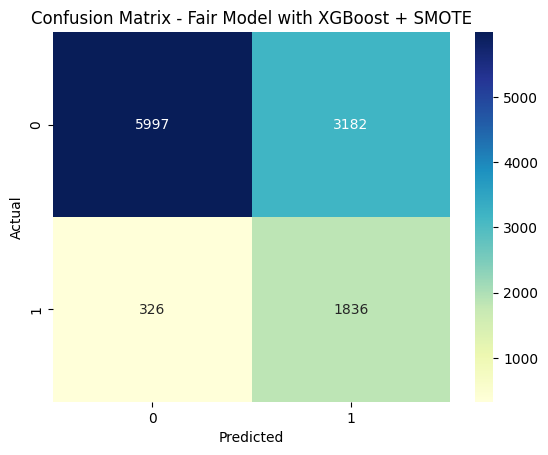

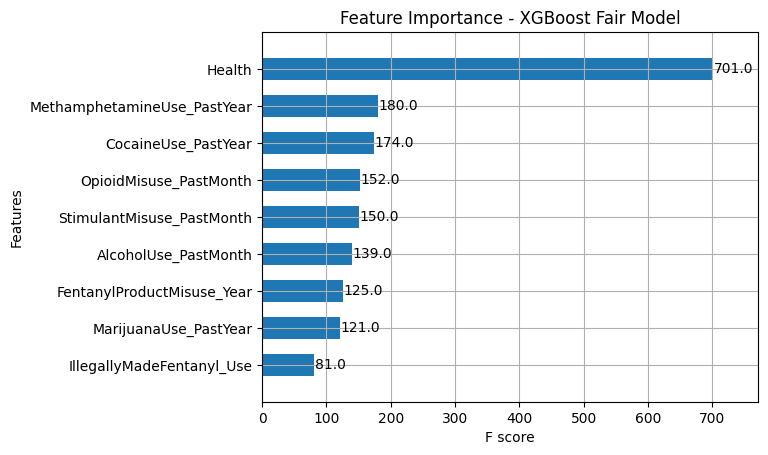

In [20]:
# Step 1: Install if not already
# pip install imbalanced-learn xgboost

# Step 2: Import everything
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3: Load your dataset
df = pd.read_csv("/Users/alarakaymak/Desktop/filtered_df.csv")

# Step 4: Define fair features (no demographics)
fair_features = [
    'AlcoholUse_PastMonth', 'MarijuanaUse_PastYear', 'CocaineUse_PastYear',
    'MethamphetamineUse_PastYear', 'OpioidMisuse_PastMonth', 'StimulantMisuse_PastMonth',
    'FentanylProductMisuse_Year', 'IllegallyMadeFentanyl_Use', 'Health'
]

X = df[fair_features]
y = df['SubstanceUseDisorder']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Apply SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Step 7: Train XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_resampled, y_resampled)

# Step 8: Predict & Evaluate
y_pred = model.predict(X_test)
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Fair Model with XGBoost + SMOTE")
plt.show()

# Optional: Feature Importance
xgb.plot_importance(model, height=0.6)
plt.title("Feature Importance - XGBoost Fair Model")
plt.show()


Logistic Regression

📊 Classification Report (Full Model):

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      9179
           1       0.52      0.36      0.43      2162

    accuracy                           0.82     11341
   macro avg       0.69      0.64      0.66     11341
weighted avg       0.80      0.82      0.80     11341



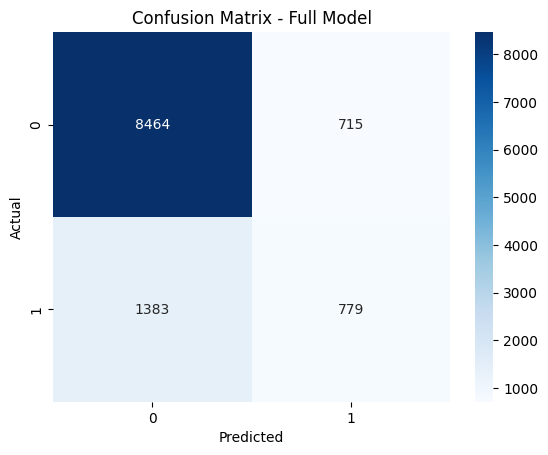

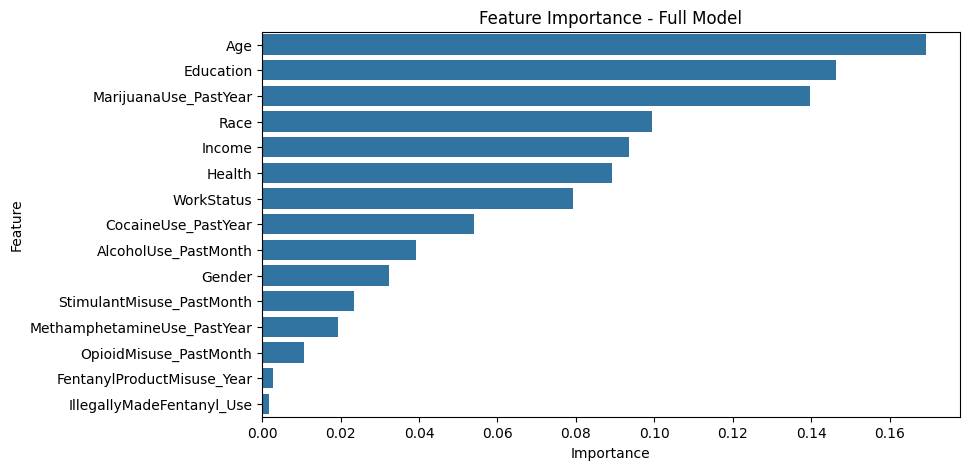

In [17]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load your dataset
df = pd.read_csv("/Users/alarakaymak/Desktop/filtered_df.csv")  # Update path if needed

# Step 3: Define the full feature set
features_full = [
    # Demographics
    'Age', 'Gender', 'Race', 'Education', 'Income', 'WorkStatus', 'Health',

    # Behavioral indicators
    'AlcoholUse_PastMonth', 'MarijuanaUse_PastYear', 'CocaineUse_PastYear',
    'MethamphetamineUse_PastYear', 'OpioidMisuse_PastMonth', 'StimulantMisuse_PastMonth',
    'FentanylProductMisuse_Year', 'IllegallyMadeFentanyl_Use'
]

X_full = df[features_full]
y_full = df['SubstanceUseDisorder']  # Target variable

# Step 4: Train-test split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Step 5: Train Random Forest
rf_full = RandomForestClassifier(n_estimators=100, random_state=42)
rf_full.fit(X_train_full, y_train_full)

# Step 6: Predict and evaluate
y_pred_full = rf_full.predict(X_test_full)
print("📊 Classification Report (Full Model):\n")
print(classification_report(y_test_full, y_pred_full))

# Step 7: Confusion Matrix
conf_matrix = confusion_matrix(y_test_full, y_pred_full)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Full Model")
plt.show()

# Step 8: Feature Importance
importances = rf_full.feature_importances_
feat_imp = pd.DataFrame({'Feature': features_full, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(9, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title("Feature Importance - Full Model")
plt.show()


              precision    recall  f1-score   support

           0       0.83      0.99      0.90      9179
           1       0.72      0.13      0.22      2162

    accuracy                           0.82     11341
   macro avg       0.77      0.56      0.56     11341
weighted avg       0.81      0.82      0.77     11341



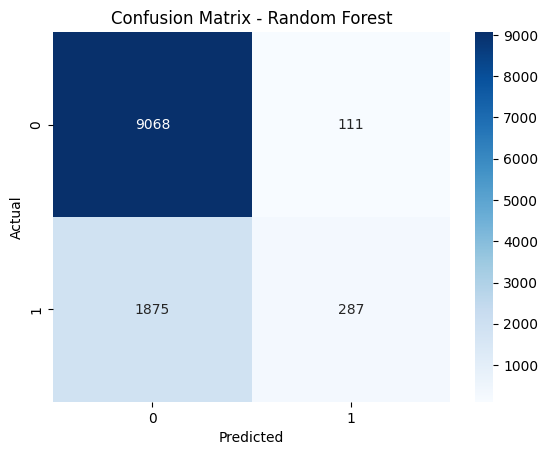

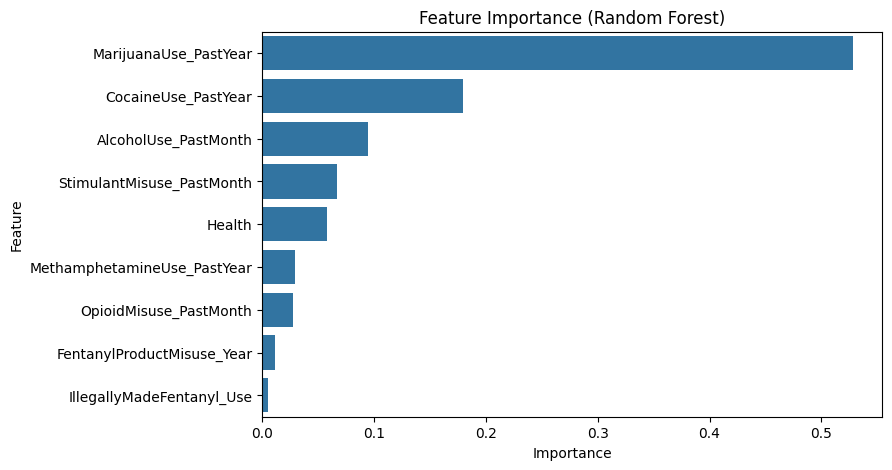

In [14]:
# Step 1: Install required libraries (only once)
# pip install pandas scikit-learn matplotlib seaborn

# Step 2: Import packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3: Load your data
df = pd.read_csv("/Users/alarakaymak/Desktop/filtered_df.csv")  # Adjust path if needed

# Step 4: Define clean, fair features (no demographics, no diagnosis)
features = [
    'AlcoholUse_PastMonth', 'MarijuanaUse_PastYear', 'CocaineUse_PastYear',
    'MethamphetamineUse_PastYear', 'OpioidMisuse_PastMonth', 'StimulantMisuse_PastMonth',
    'FentanylProductMisuse_Year', 'IllegallyMadeFentanyl_Use', 'Health'
]

X = df[features]
y = df['SubstanceUseDisorder']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 7: Predict and evaluate
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Optional: Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Optional: Feature importance
importances = rf_model.feature_importances_
feat_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)

# Plot top features
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_importance)
plt.title("Feature Importance (Random Forest)")
plt.show()


In [15]:
# Example: One person who misused multiple drugs
new_data = pd.DataFrame([{
    'AlcoholUse_PastMonth': 1,
    'MarijuanaUse_PastYear': 1,
    'CocaineUse_PastYear': 1,
    'MethamphetamineUse_PastYear': 0,
    'OpioidMisuse_PastMonth': 1,
    'StimulantMisuse_PastMonth': 1,
    'FentanylProductMisuse_Year': 1,
    'IllegallyMadeFentanyl_Use': 1,
    'Health': 2  # Poor
}])

prediction = rf_model.predict(new_data)
print("Predicted Substance Use Disorder:", "Yes" if prediction[0] == 1 else "No")


Predicted Substance Use Disorder: Yes
